# 군집화(Clustering)
: 비지도 학습으로 정답 없이 특징만 가지고 데이터로 모델을 구현

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

df = pd.read_csv('../data/student_kmeans.csv')
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


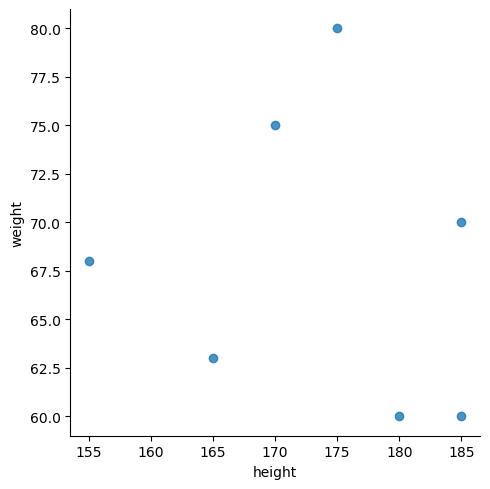

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    x = 'height',
    y = 'weight',
    data = df,
    fit_reg=False,
)
plt.show()

### k-Means 군집화

In [12]:
from sklearn.cluster import KMeans

data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

In [13]:
# 각 군집의 중심위치

kmeans.cluster_centers_

array([[183.33333333,  63.33333333],
       [160.        ,  65.5       ],
       [172.5       ,  77.5       ]])

In [16]:
# 데이터가 어느 군집에 있는지 저장

df['cluster_id'] = kmeans.labels_
df

,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,0
3,165,63,1
4,155,68,1
5,170,75,2
6,175,80,2


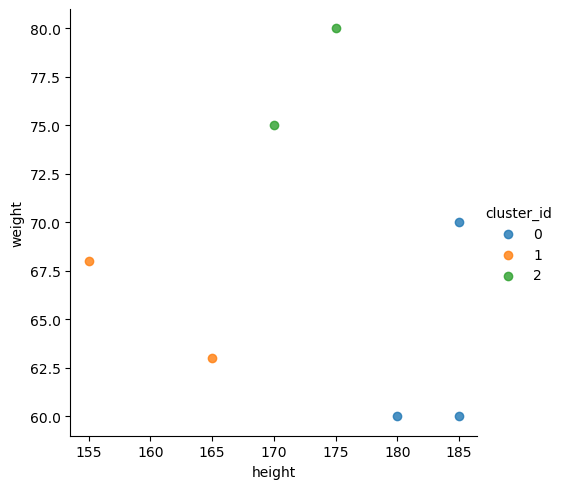

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(
    x = 'height',
    y = 'weight',
    data = df,
    fit_reg=False,
    hue='cluster_id'
)
plt.show()

### IRIS 군집화


In [18]:
iris = pd.read_csv("../data/iris.csv")
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
# Name을 숫자로 변환하기

iris['Name'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris['Name'] = iris['Name'].map({'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2})

In [24]:
iris['Name'].unique()

array([0, 1, 2])

In [26]:
# 정답을 제외한 DataSet만들기
iris2 = iris.iloc[:,:4]
iris2.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# k - Means로 군집화 : n_cluster = 3

kmeans = KMeans(n_clusters=3)

kmeans.fit(iris2)


KMeans(n_clusters=3)

In [29]:
kmeans.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

In [31]:
iris['cluster_id'] = kmeans.labels_
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,cluster_id
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


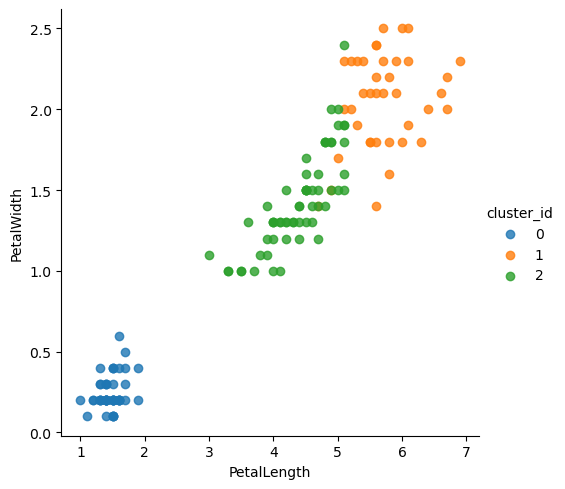

In [34]:
sns.lmplot(
    x = 'PetalLength',
    y = 'PetalWidth',
    data = iris,
    fit_reg=False,
    hue='cluster_id'
)
plt.show()